# $H_2O$ box size effect

load libraries

In [1]:
import mdtraj as md
import numpy as np
import os
import random
import scipy as sp
import sys
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/NPBCpy")
import npbc_io, npbc_analysis, npbc_cy
%autoreload 2

## Load data

In [3]:
#box_sizes = np.array((8.5, 10, 12, 15, 17, 20))
#traj_names = ["radius085", "radius10", "radius12","radius15", "radius17","radius20"]
box_sizes = np.array((8.5, 10, 12))
traj_names = ["radius085", "radius10", "radius12"]
pdbs = [n+".pdb" for n in traj_names]
indexes = [n+".ndx" for n in traj_names]

#### vacuum

In [4]:
os.chdir("/home/gmancini/data/devel/gaussian/test_nb/vacuum")

In [5]:
Vtrajs = [md.load(n+".xtc", top=n+".pdb") for n in traj_names]
tops = [trj.topology for trj in Vtrajs]
weights = [[a.element.mass for a in top.atoms] for top in tops]
weights = np.array(weights, dtype=object)

#### ddCosmo

In [6]:
os.chdir("/home/gmancini/data/devel/gaussian/test_nb/ddCosmo")

In [7]:
Dtrajs = [md.load(n+".xtc", top=n+".pdb") for n in traj_names]

### print number of frames

In [8]:
for trj in Vtrajs:
    print(trj.n_frames)

12501
125001
125001


In [9]:
for trj in Dtrajs:
    print(trj.n_frames)

12501
125001
125001


# Properties

## radial distribution functions (O-O)

Index files are the `vacuum` folder

In [100]:
os.chdir("/home/gmancini/data/devel/gaussian/test_nb/vacuum")

In [101]:
VRDF = list()
DRDF = list()

### radius 8.5

RDF calculation parameters

In [102]:
shift = np.zeros(3)
nbins = 100
calc_cn = True
smooth = False
norm = True
shift = shift/10

In [103]:
rmax = np.asarray((0., 4.5))
dmax = 4.
radius = 8.5
radius = radius/10.
dmax = dmax/10
rmax = rmax/10

**vacuum**

In [104]:
traj = Vtrajs[0]
ndx = indexes[0] 

In [105]:
select = (1,1)
group_A, group_B = npbc_io.parse_index(ndx, select)

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 1:O
--- Selected groups 1:O


In [106]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1001, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
VRDF.append(rdf_oo)

--- Number density in system is  22.935416183403607
--- Read  11501  frames
--- Average number of reference molecules  13.460742544126598
--- Average number density in dmax  29.42339594477752


**ddCosmo**

In [107]:
traj = Dtrajs[0]

In [108]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1001, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
DRDF.append(rdf_oo)

--- Number density in system is  22.935416183403607
--- Read  11501  frames
--- Average number of reference molecules  13.202764976958525
--- Average number density in dmax  29.692255963649124


### radius 10

In [109]:
rmax = np.asarray((0., 6.))
dmax = 4.
radius = 10.
radius = radius/10.
dmax = dmax/10
rmax = rmax/10

**vacuum**

In [110]:
traj = Vtrajs[1]
ndx = indexes[1] 

In [111]:
group_A, group_B = npbc_io.parse_index(ndx, select)

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 1:O
--- Selected groups 1:O


In [112]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1001, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
VRDF.append(rdf_oo)

--- Number density in system is  38.91338358596841
--- Read  124001  frames
--- Average number of reference molecules  33.40589188796864
--- Average number density in dmax  33.62856081853912


**ddCosmo**

In [113]:
traj = Dtrajs[1]

In [114]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1501, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
DRDF.append(rdf_oo)
rdf_oo.shape

--- Number density in system is  38.91338358596841
--- Read  123501  frames
--- Average number of reference molecules  33.67748439283893
--- Average number density in dmax  34.09649845745834


(100, 3)

### radius 12

In [115]:
rmax = np.asarray((0., 8.))
dmax = 4.
radius = 10.
radius = radius/10.
dmax = dmax/10
rmax = rmax/10

**vacuum**

In [116]:
traj = Vtrajs[2]
ndx = indexes[2] 

In [117]:
select = (1,1)
group_A, group_B = npbc_io.parse_index(ndx, select)

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 1:O
--- Selected groups 1:O


In [121]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1001, 10000, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
VRDF.append(rdf_oo)
rdf_oo.shape

--- Number density in system is  70.66479473280154
--- Read  9000  frames
--- Average number of reference molecules  71.98944444444444
--- Average number density in dmax  30.07166530046357


(100, 3)

**ddCosmo**

In [122]:
traj = Dtrajs[2]

In [123]:
xbins, rdf, cn = npbc_analysis.calc_rdf(1001, traj.n_frames, nbins, calc_cn, smooth, norm, radius, \
                                  rmax, dmax, shift, traj, group_A, group_B)
rdf_oo = np.vstack((xbins, rdf, cn)).T
DRDF.append(rdf_oo)
rdf_oo.shape

--- Number density in system is  70.66479473280154
--- Read  124001  frames
--- Average number of reference molecules  72.02453206022533
--- Average number density in dmax  29.990869245278002


(100, 3)

**PBC data**

In [124]:
pbc_rdf = np.loadtxt("../rdf_spc_pbc.dat")

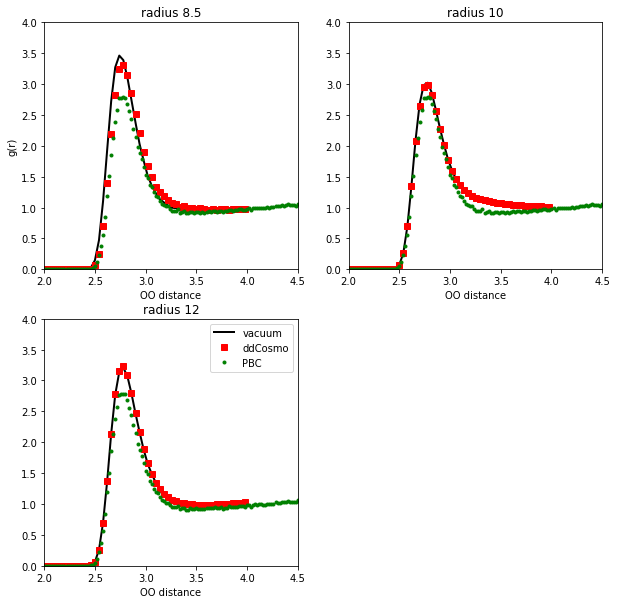

In [125]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.xlim((2., 4.5))
plt.ylim((0., 4.))
plt.title('radius 8.5')
plt.plot(VRDF[0][:,0], VRDF[0][:,1], 'k-', linewidth=2)
plt.plot(DRDF[0][:,0], DRDF[0][:,1], 'rs--', linewidth=0)
plt.plot(pbc_rdf[:,0], pbc_rdf[:,1], 'g.', linewidth=1)
plt.xlabel("OO distance")
plt.ylabel("g(r)")

plt.subplot(222)
plt.xlim((2., 4.5))
plt.ylim((0., 4.))
plt.title('radius 10')
plt.plot(VRDF[1][:,0], VRDF[1][:,1], 'k-', linewidth=2)
plt.plot(DRDF[1][:,0], DRDF[1][:,1], 'rs--', linewidth=0)
plt.plot(pbc_rdf[:,0], pbc_rdf[:,1], 'g.', linewidth=1)
plt.xlabel("OO distance")

plt.subplot(223)
plt.xlim((2., 4.5))
plt.ylim((0., 4.))
plt.title('radius 12')
plt.plot(VRDF[-1][:,0], VRDF[-1][:,1], 'k-', linewidth=2, label='vacuum')
plt.plot(DRDF[-1][:,0], DRDF[-1][:,1], 'rs--', linewidth=0, label='ddCosmo')
plt.plot(pbc_rdf[:,0], pbc_rdf[:,1], 'g.', linewidth=1, label='PBC')
plt.xlabel("OO distance")
plt.legend()

In [126]:
fVRDF = np.array((VRDF[0][:,0], VRDF[0][:,1], VRDF[2][:,1]))
fDRDF = np.array((DRDF[0][:,0], DRDF[0][:,1], DRDF[2][:,1]))

In [127]:
np.savetxt("vacuum_rdf_8_10_12.dat", fVRDF)
np.savetxt("ddc_rdf_8_10_12.dat", fDRDF)

## density 

concentric layers of constant volume

In [35]:
select = (0)
natoms = 3
nbins = 5
volume = True
from_wall = True

### radius 8.5

In [36]:
VRHO = list()
DRHO = list()

#### vacuum

In [37]:
traj = Vtrajs[0]
ndx = indexes[0] 

In [38]:
rmin = 0.
rmax = 8.5/10.
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [39]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                 Radii, weights[0])
rho = rho.T
VRHO.append(rho)

--- Using concentrinc shells of volume:  0.5144881569028883  angstroem^3
--- Layer  1  radii=  0.0 -> 0.4970830154961872  nm, Vol, 0.5144881569028884
--- Layer  2  radii=  0.4970830154961872 -> 0.6262853547688657  nm, Vol, 0.5144881569028884
--- Layer  3  radii=  0.6262853547688657 -> 0.7169177655064869  nm, Vol, 0.5144881569028887
--- Layer  4  radii=  0.7169177655064869 -> 0.7890701017141724  nm, Vol, 0.5144881569028877
--- Layer  5  radii=  0.7890701017141724 -> 0.85  nm, Vol, 0.5144881569028885
--- # Atoms and molecules 177 59.0
--- Average density (for molecules), is:  22.935416183403607  molecules/nm3, i.e.  38.08515459443297  mol/l
--- Reading frames
--- Read  11501  frames


**ddCosmo**

In [40]:
traj = Dtrajs[0]
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                    Radii, weights[0])
rho = rho.T
DRHO.append(rho)

--- Reading frames
--- Read  11501  frames


### radius 10

#### vacuum

In [41]:
traj = Vtrajs[1]
ndx = indexes[1] 

In [42]:
rmin = 0.
rmax = 10/10.
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [43]:
traj

<mdtraj.Trajectory with 125001 frames, 489 atoms, 1 residues, without unitcells at 0x7fe96ae4e820>

In [44]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                 Radii, weights[1])
rho = rho.T
VRHO.append(rho)

--- Using concentrinc shells of volume:  0.8377580409572781  angstroem^3
--- Layer  1  radii=  0.0 -> 0.5848035476425733  nm, Vol, 0.8377580409572782
--- Layer  2  radii=  0.5848035476425733 -> 0.7368062997280773  nm, Vol, 0.837758040957278
--- Layer  3  radii=  0.7368062997280773 -> 0.8434326653017493  nm, Vol, 0.8377580409572789
--- Layer  4  radii=  0.8434326653017493 -> 0.9283177667225558  nm, Vol, 0.8377580409572779
--- Layer  5  radii=  0.9283177667225558 -> 1.0  nm, Vol, 0.8377580409572775
--- # Atoms and molecules 489 163.0
--- Average density (for molecules), is:  38.91338358596841  molecules/nm3, i.e.  64.61719368042206  mol/l
--- Reading frames
--- Read  124001  frames


**ddCosmo**

In [45]:
traj = Dtrajs[1]
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                    Radii, weights[1])
rho = rho.T
DRHO.append(rho)

--- Reading frames
--- Read  124001  frames


### radius 12

#### vacuum

In [46]:
traj = Vtrajs[2]
ndx = indexes[2] 

In [47]:
rmin = 0.
rmax = 12/10.
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [48]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                 Radii, weights[2])
rho = rho.T
VRHO.append(rho)

--- Using concentrinc shells of volume:  1.4476458947741764  angstroem^3
--- Layer  1  radii=  0.0 -> 0.7017642571710878  nm, Vol, 1.4476458947741764
--- Layer  2  radii=  0.7017642571710878 -> 0.8841675596736928  nm, Vol, 1.4476458947741764
--- Layer  3  radii=  0.8841675596736928 -> 1.0121191983620992  nm, Vol, 1.4476458947741786
--- Layer  4  radii=  1.0121191983620992 -> 1.113981320067067  nm, Vol, 1.4476458947741753
--- Layer  5  radii=  1.113981320067067 -> 1.2  nm, Vol, 1.4476458947741753
--- # Atoms and molecules 888 296.0
--- Average density (for molecules), is:  40.893978433334226  molecules/nm3, i.e.  67.90604880071622  mol/l
--- Reading frames
--- Read  124001  frames


**ddCosmo**

In [49]:
traj = Dtrajs[2]
rho = npbc_analysis.calc_density(1001, traj.n_frames, shift, from_wall, volume, traj, target, natoms, \
                                    Radii, weights[2])
rho = rho.T
DRHO.append(rho)

--- Reading frames
--- Read  124001  frames


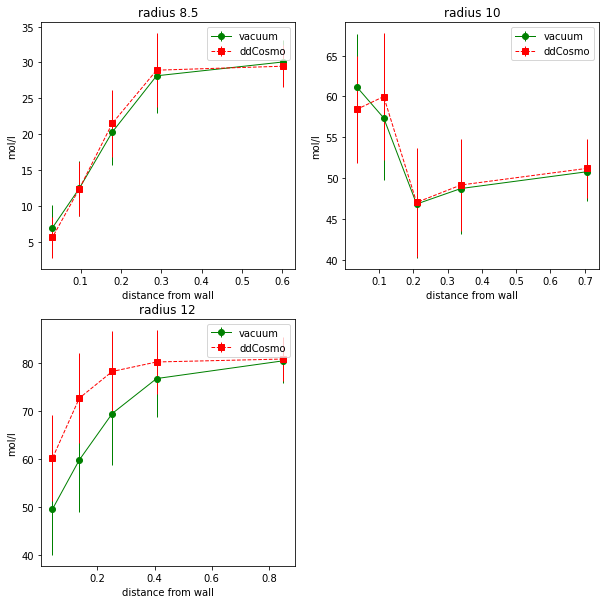

In [50]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title('radius 8.5')
plt.errorbar(VRHO[0][:,0], VRHO[0][:,1], fmt='go-', yerr=VRHO[0][:,2], linewidth=1, label='vacuum')
plt.errorbar(DRHO[0][:,0], DRHO[0][:,1], fmt='rs--', yerr=DRHO[0][:,2], linewidth=1, label='ddCosmo')
plt.xlabel("distance from wall")
plt.ylabel("mol/l")
plt.legend()

plt.subplot(222)
plt.title('radius 10')
plt.errorbar(VRHO[1][:,0], VRHO[1][:,1], fmt='go-', yerr=VRHO[1][:,2], linewidth=1, label='vacuum')
plt.errorbar(DRHO[1][:,0], DRHO[1][:,1], fmt='rs--', yerr=DRHO[1][:,2], linewidth=1, label='ddCosmo')
plt.xlabel("distance from wall")
plt.ylabel("mol/l")
plt.legend()

plt.subplot(223)
plt.title('radius 12')
plt.errorbar(VRHO[2][:,0], VRHO[2][:,1], fmt='go-', yerr=VRHO[2][:,2], linewidth=1, label='vacuum')
plt.errorbar(DRHO[2][:,0], DRHO[2][:,1], fmt='rs--', yerr=DRHO[2][:,2], linewidth=1, label='ddCosmo')
plt.xlabel("distance from wall")
plt.ylabel("mol/l")
plt.legend()

In [51]:
fVRHO = np.array((VRHO[0][:,0], VRHO[0][:,1], VRHO[2][:,1]))
fDRHO = np.array((DRHO[0][:,0], DRHO[0][:,1], DRHO[2][:,1]))

In [52]:
np.savetxt("vacuum_rdf_8_10_12.dat", fVRHO)
np.savetxt("ddc_rdf_8_10_12.dat", fDRHO)

In [53]:
VRHO[0]-DRHO[0]

array([[ 0.        ,  0.59167804,  0.07173455],
       [ 0.        , -0.78168494,  0.06363447],
       [ 0.        , -1.21771902, -0.03110292],
       [ 0.        ,  0.05168881,  0.05889702],
       [ 0.        ,  1.335968  ,  0.33412714]])

In [54]:
VRHO[0]

array([[ 0.60145849, 30.0717691 ,  3.0397742 ],
       [ 0.28831581, 28.142968  ,  5.18695617],
       [ 0.17839844, 20.283959  ,  4.62363198],
       [ 0.09700607, 12.45425958,  3.82955114],
       [ 0.03046495,  6.96557228,  3.22778646]])

In [55]:
DRHO[0]

array([[ 0.60145849, 29.48009106,  2.96803964],
       [ 0.28831581, 28.92465294,  5.12332171],
       [ 0.17839844, 21.50167802,  4.6547349 ],
       [ 0.09700607, 12.40257077,  3.77065412],
       [ 0.03046495,  5.62960428,  2.89365932]])

## orientation

angle between dipole moment vector and sphere radius passing trought the center of mass

In [56]:
VT = list()
DT = list()

In [57]:
select = (0)
natoms = 3
nbins = 5
normV = False
axis = False
shift = np.zeros(3)
natoms = 3
top = tops[0]

### radius 8.5

#### vacuum

In [58]:
rmin = 0.
rmax = 8.5/10.

In [59]:
traj = Vtrajs[0]
ndx = indexes[0]

In [60]:
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [61]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)

--- Using concentrinc shells of volume:  0.5144881569028883  angstroem^3
--- Layer  1  radii=  0.0 -> 0.4970830154961872  nm, Vol, 0.5144881569028884
--- Layer  2  radii=  0.4970830154961872 -> 0.6262853547688657  nm, Vol, 0.5144881569028884
--- Layer  3  radii=  0.6262853547688657 -> 0.7169177655064869  nm, Vol, 0.5144881569028887
--- Layer  4  radii=  0.7169177655064869 -> 0.7890701017141724  nm, Vol, 0.5144881569028877
--- Layer  5  radii=  0.7890701017141724 -> 0.85  nm, Vol, 0.5144881569028885
--- # Atoms and molecules 177 59.0
--- Average density (for molecules), is:  22.935416183403607  molecules/nm3, i.e.  38.08515459443297  mol/l


In [62]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[0], natoms)
VT.append(theta)

--- Read  11501  frames


#### ddCosmo

In [63]:
traj = Dtrajs[0]

In [64]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[0], natoms)
DT.append(theta)

--- Read  11501  frames


### radius 10

#### vacuum

In [65]:
rmin = 0.
rmax = 10/10.

In [66]:
traj = Vtrajs[1]
ndx = indexes[1]

In [67]:
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [68]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)

--- Using concentrinc shells of volume:  0.8377580409572781  angstroem^3
--- Layer  1  radii=  0.0 -> 0.5848035476425733  nm, Vol, 0.8377580409572782
--- Layer  2  radii=  0.5848035476425733 -> 0.7368062997280773  nm, Vol, 0.837758040957278
--- Layer  3  radii=  0.7368062997280773 -> 0.8434326653017493  nm, Vol, 0.8377580409572789
--- Layer  4  radii=  0.8434326653017493 -> 0.9283177667225558  nm, Vol, 0.8377580409572779
--- Layer  5  radii=  0.9283177667225558 -> 1.0  nm, Vol, 0.8377580409572775
--- # Atoms and molecules 489 163.0
--- Average density (for molecules), is:  38.91338358596841  molecules/nm3, i.e.  64.61719368042206  mol/l


In [69]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[1], natoms)
VT.append(theta)

--- Read  124001  frames


#### ddCosmo

In [70]:
traj = Dtrajs[1]

In [71]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[1], natoms)
DT.append(theta)

--- Read  124001  frames


### radius 12

#### vacuum

In [72]:
rmin = 0.
rmax = 12/10.

In [73]:
traj = Vtrajs[2]
ndx = indexes[2]

In [74]:
target = npbc_io.parse_index(ndx, [select])

--- Parsing index file
--- Found 3 atom groups
--- Selected groups 0:System


In [75]:
vol, Radii = npbc_io.sphere_radii(target, natoms, nbins, volume, rmin, rmax)

--- Using concentrinc shells of volume:  1.4476458947741764  angstroem^3
--- Layer  1  radii=  0.0 -> 0.7017642571710878  nm, Vol, 1.4476458947741764
--- Layer  2  radii=  0.7017642571710878 -> 0.8841675596736928  nm, Vol, 1.4476458947741764
--- Layer  3  radii=  0.8841675596736928 -> 1.0121191983620992  nm, Vol, 1.4476458947741786
--- Layer  4  radii=  1.0121191983620992 -> 1.113981320067067  nm, Vol, 1.4476458947741753
--- Layer  5  radii=  1.113981320067067 -> 1.2  nm, Vol, 1.4476458947741753
--- # Atoms and molecules 888 296.0
--- Average density (for molecules), is:  40.893978433334226  molecules/nm3, i.e.  67.90604880071622  mol/l


In [76]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[2], natoms)
VT.append(theta)

--- Read  124001  frames


#### ddCosmo

In [77]:
traj = Dtrajs[2]

In [78]:
tf, theta = npbc_analysis.calc_orient(normV, 1000, traj.n_frames, traj, shift, top, target[0], axis, vol,\
                                  Radii, weights[2], natoms)
DT.append(theta)

--- Read  124001  frames


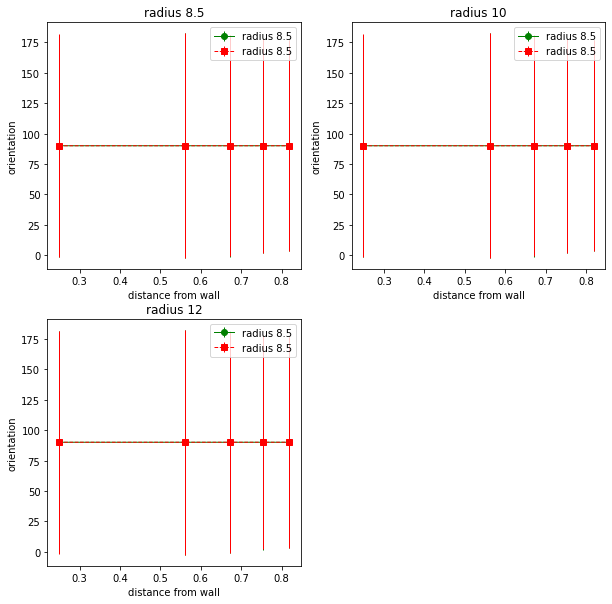

In [79]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title('radius 8.5')
plt.errorbar(VT[0][:,0], VT[0][:,1], fmt='go-', yerr=VT[0][:,2], linewidth=1, label='radius 8.5')
plt.errorbar(DT[0][:,0], DT[0][:,1], fmt='rs--', yerr=DT[0][:,2], linewidth=1, label='radius 8.5')
plt.xlabel("distance from wall")
plt.ylabel("orientation")
plt.legend()

plt.subplot(222)
plt.title('radius 10')
plt.errorbar(VT[0][:,0], VT[0][:,1], fmt='go-', yerr=VT[0][:,2], linewidth=1, label='radius 8.5')
plt.errorbar(DT[0][:,0], DT[0][:,1], fmt='rs--', yerr=DT[0][:,2], linewidth=1, label='radius 8.5')
plt.xlabel("distance from wall")
plt.ylabel("orientation")
plt.legend()

plt.subplot(223)
plt.title('radius 12')
plt.errorbar(VT[0][:,0], VT[0][:,1], fmt='go-', yerr=VT[0][:,2], linewidth=1, label='radius 8.5')
plt.errorbar(DT[0][:,0], DT[0][:,1], fmt='rs--', yerr=DT[0][:,2], linewidth=1, label='radius 8.5')
plt.xlabel("distance from wall")
plt.ylabel("orientation")
plt.legend()

In [80]:
VT[0]-DT[0]

array([[ 0.00000000e+00, -8.59351562e-04, -2.08047464e-01],
       [ 0.00000000e+00, -1.25546459e-03,  1.06035252e-02],
       [ 0.00000000e+00, -4.97534012e-04,  4.16616719e-01],
       [ 0.00000000e+00,  7.55569479e-04,  5.29874174e-01],
       [ 0.00000000e+00, -6.28685461e-03, -4.61537338e-02]])

In [81]:
VT[1]-DT[1]

array([[ 0.00000000e+00,  5.97158542e-05,  2.22931352e-02],
       [ 0.00000000e+00,  1.48027746e-04, -9.22138047e-02],
       [ 0.00000000e+00,  9.63704423e-06, -1.58887956e-01],
       [ 0.00000000e+00,  7.03510644e-06,  1.95095536e-01],
       [ 0.00000000e+00,  2.55516083e-06, -5.48369239e-01]])